<img src='https://dr-hkim.github.io/assets/article_images/FILES_2018-11-26-Naver-News-Word-Cloud-in-R/Rplot.png' style="width:50px;">

위의 그림 처럼 인터넷 게시글이나, 텍스트 파일에 등장하는 단어들의 빈도를 계산해서, 중요한(등장 횟수가 큰) 단어는 크게 표현하고 그렇지 않은 것은 작게 표현하는 것을 워드 클라우드라고 합니다.
워드 클라우드를 사용하면 텍스트 분석 결과를 시각화 할 때, 전달력이 올라가므로 사용법을 익혀 두면 유용합니다.
<br>
- 대개 한국 학생들은 한글 문서 분석과 영문자 분석을 하게 되는데, 그 중 한글 문서 분석을 하려면 konlpy 라는 라이브러리를 설치해야 합니다. 
- konlpy 는 한글 형태소 분석기라고 하는데, 한글 문서를 형태소 단위로 분석하는데 사용됩니다.
- 영어는 대부분 띄어쓰기 단위로 단어의 의미가 완전히 구분되는데, 한글은 '조사'라는 개념이 있어서 글을 형태소 단위로 분해해야 합니다. 그래서 형태소 분석기를 사용합니다.
- 또한 워드클라우드가 영어베이스라서 한글 표현이 잘 되지 않는 문제가 있습니다. 이를 해결하기 위해 한글 폰트인 나눔 서체를 먼저 설치하고 시작합니다.
- 마지막 부분에서 형태소 분해 없이 워드클라우드를 만들어 보겠습니다. 

# 1단계 : 한글폰트 설치
- 아래 부분은  Google Colab에서 한글폰트를 설치하는 과정입니다.
- 코드창 셀에 붙여넣기 해서 실행하세요
- 워드 클라우드나, 그래프에서 한글을 사용하려면 필요합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2단계 : 워드 클라우드 설치
 - colab에서 한글 형태소 분석기인 konlpy를 설치합니다.

In [ ]:
!pip install konlpy

In [ ]:
#워드 클라우드
from wordcloud import wordcloud
#그래프 처리를 위한 라이브러리
import matplotlib.pyplot as plt

#한글 형태소 분석기 임포트, 트위터 제공모듈
from konlpy.tag import Okt
okt = Okt()

#카운팅 모듈 불러오기
from collections import Counter

# 3단계 : 설치 테스트
- 다음 코드를 실행시켜 봅니다.
- 실행이 잘 되면 한글 형태소 분석기 설치가 잘 마무리 된 것입니다.

In [ ]:
print(okt.pos('아버지가 방에 들어가신다.'))
print(okt.pos('아버지가방에들어가신다.'))

- Noun 은 명사, Josa는 조사.. 등등입니다.
- 띄어쓰기의 중요성을 알 수 있습니다.

#4단계 - 한글 텍스트 기사를 텍스트 파일로 가져오기
- 다음 링크에서 [무정](https://drive.google.com/file/d/1mazKpaYvZfGGxklkeatYG7nQZHv47JFa/view?usp=sharing) 본문을 다운 받습니다.<br>
- 혹은 원하는 기사를 적당하게 복사하여 메모장을 열고 붙여 넣고 저장(utf-8)합니다. 
- 파일명은 찾기 쉬운 이름으로합니다. .
- 코랩 노트북 왼쪽 상단 메뉴를 보시면 돋보기 아이콘, < >, 폴더아이콘이 있습니다. 폴더 아이콘을 클릭합니다.<br>
- 그러면 버튼 세개가 나오는데 그 중 첫번째가 파일 업로드 버튼<br>
- 파일 업로드 버튼을 클릭하여 앞에서 저장한 파일을 업로드 합니다.<br>

- 코드는 복붙 하시면 됩니다. 

#5단계 - 업로드한 텍스트 파이썬에서 불러오기
- 업로드한 파일을 불러오는 내용
- 무정.txt 부분을 자신이 업로드한 파일명에 맞게 수정합니다.

In [ ]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드
from google.colab import files
file_uploaded=files.upload()

In [ ]:
#파이썬을 이용해 텍스트 파일 읽어들이기
#구글 드라이브에 있는 파일 불러오는 부분
f=open('무정.txt', 'r', encoding='UTF-8')
line=f.readline()           #한 줄만 읽어들임
print(line)                 #읽어온 줄 출력

string=f.read()                  #본문의 내용을 문자열로 저장
print(string)                   #전체 보여주기(옵션)

- string=f.read()
- 분석을 하기 위해 파일의 내용을 한번에 문자열로 바꿉니다.

#6단계 - 텍스트의 정규화 실행

- 정규화 실행. normalize는 정규화 처리를 해주는 함수입니다. 쉽게 생각해서 어지럽여진 문장을 깔끔하게 만들어준다는 생각을 하면 됩니다. 
- 예시로 "안녕하세욬ㅋ"의 경우 "안녕하세요ㅋ"로 "샤릉해"는 "사랑해"로 변환합니다.
- 정규화 처리를 하게 되면, 단어의 개수를 줄일 수 있어서 자연어 처리 성능을 얻을 수 있을것입니다.

In [ ]:
#정규화 예제입니다.
example_normal=okt.normalize('우짜라고')
print(example_normal)

어떻게하라고


In [ ]:
#string으로 저장된 내용 정규화
example_normal=okt.normalize(string)
print(example_normal)

#7단계 - 문자열을 형태소 단위로 분해
- okt 에 대한 자세한 내용은 검색찬스 쓰시고
- okt.pos() 가 형태소 단위로 문자열을 분석합니다.

In [ ]:
#형태소 분석
okt_pos = okt.pos(string, norm=True, stem=True)
print(okt_pos)

Output hidden; open in https://colab.research.google.com to view.

#9단계 - 필터링 및 불용어, 한 글자 형태소 제거
- 한 글자 형태소 제거는 필요 없을 수도 있습니다.
- 불용어도 상황에 맞게 리스트로 정리해야 합니다.

In [ ]:
#명사, 형용사, 동사, 형용사, 부사, 알파벳만 필터링
okt_filtered=[x for x, y in okt_pos if y in ['Noun', 'Adjective', 'Verb', 'Adverb']]
# okt_filtered=[x for x, y in okt_pos if y in ['Noun', 'Adjective', 'Verb', 'Adverb', 'Alpha']]

#불용어, 한글자 형태소 제거
unused=['것', '수', '이','나', '너', '하다', '있다', '되다','정말','같다','은', '그', '의','잠']

for i, v in enumerate(okt_filtered):
  if v in unused:
    okt_filtered.pop(i)
print(okt_filtered)



#10. 카운팅
- wordList 안에 있는 단어들이 몇개씩 있는지 리스트로 만듭니다. 
- wordCount={} 딕셔너리라는 자료 구조 입니다. 데이터 분석할 때 종종 나오게 됩니다. [딕셔너리 문법 참고](https://wikidocs.net/16)

In [ ]:
#카운팅, 정렬 하는 부분


In [ ]:
# key 순으로 정렬

#정렬 결과 출력


In [ ]:
#빈도순 상위 10개 출력


#워드 클라우드 생성
- 워드클라우드와 matplotlib를 임포트 해야 합니다.

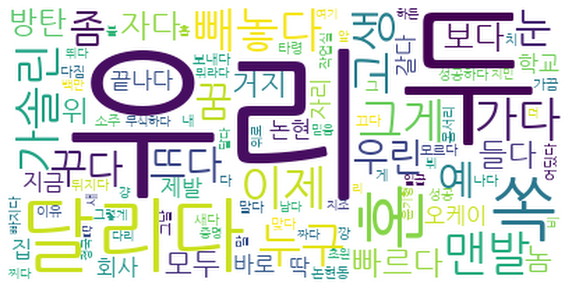

In [ ]:
#워드 클라우드

#그래프 처리를 위한 라이브러리

#빈도수를 이용하여 워드 클라우드 생성 : dict(noun_list) - 빈도수 튜플로 사전 생성해서 넘겨주고 워드 클라우드 생성

#이미지 사이즈 지정


 #이미지의 부드럽기 정도
 #x y 축 숫자 제거
plt.show()

#워드 클라우드를 원하는 테두리에 넣기
- 전문용어로 마스크(mask)를 이용한다고 표현합니다.
- 아래와 같은 그림의 검은색 영역안에 워드클라우드를 만들어 보겠습니다.
- 아래 그림을 다른이름으로 저장하고, 파일명을 mask.png로 저장합니다.
- 그리고 위의 무정.txt 파일처럼 구글 드라이브에 업로드 합니다. 


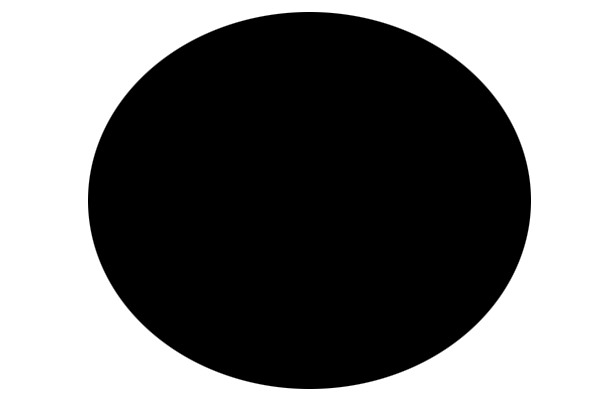

In [ ]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드


In [ ]:
#이미지 마스크를 이용해 원하는 모양으로 만들기
#이미지 다루는 라이브러리
from PIL import Image
#이미지를 배열로 만드는 라이브러리
import numpy as np

mask=np.array(Image.open('mask (3).png'))
#빈도수를 이용하여 워드 클라우드 생성 : dict(noun_list) - 빈도수 튜플로 사전 생성해서 넘겨주고 워드 클라우드 생성


#이미지 사이즈 지정
plt.figure(figsize=(10,10))


plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()

# 형태소 분해 없이 워드 클라우드 만들기
- 시간이 없을 때 사용합니다.
- 빈도수 세는 과정 같은거 자동으로 처리합니다.


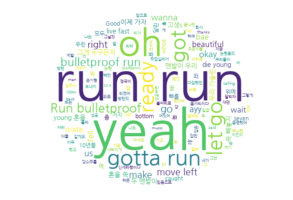